# Project Name: Flight Fare Prediction
Dataset Link: https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh

### Primary Libraries

In [2]:
import pandas as pd
import numpy as np
import warnings 

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

### Dataset Call

In [3]:
# we need to import the dataset
data=pd.read_excel('data.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# to show the shape of the dataset
print(f'number of rows : {data.shape[0]}\nnumber of columns: {data.shape[1]}')

number of rows : 10683
number of columns: 11


In [5]:
# to show the datatypes and the related information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [40]:
# most of the features are of object type except for the Price which is int64

### Missing Values

In [6]:
# lets see how much missing value the dataset contains in each of the columns
for feat in data.columns:
    print(f'{feat}:      {round(100*data[feat].isnull().mean(),3)} % missing values')

Airline:      0.0 % missing values
Date_of_Journey:      0.0 % missing values
Source:      0.0 % missing values
Destination:      0.0 % missing values
Route:      0.009 % missing values
Dep_Time:      0.0 % missing values
Arrival_Time:      0.0 % missing values
Duration:      0.0 % missing values
Total_Stops:      0.009 % missing values
Additional_Info:      0.0 % missing values
Price:      0.0 % missing values


In [7]:
# there is almost no missing values, only the Total_Stops feature has a 0.009 % missing values
# under this situation it will be okay to remove the missing values completly
data.dropna(inplace=True)

print('Data Dimension after the removal of the missing values\n')
print(f'number of rows : {data.shape[0]}\nnumber of columns: {data.shape[1]}')

Data Dimension after the removal of the missing values

number of rows : 10682
number of columns: 11


In [8]:
# missing value the dataset contains in each of the columns after removal of missing values
for feat in data.columns:
    print(f'{feat}:      {round(100*data[feat].isnull().mean(),3)} % missing values')

Airline:      0.0 % missing values
Date_of_Journey:      0.0 % missing values
Source:      0.0 % missing values
Destination:      0.0 % missing values
Route:      0.0 % missing values
Dep_Time:      0.0 % missing values
Arrival_Time:      0.0 % missing values
Duration:      0.0 % missing values
Total_Stops:      0.0 % missing values
Additional_Info:      0.0 % missing values
Price:      0.0 % missing values


### Exploratory Data Analysis

In [9]:
# observe that the journey date is given in the string format that is not understandable by the machine
# therefore we need to to extract the the journey day and journey month information from the given date string which is required 
# for building the model
# also we are dropping the Date_of_Journey column after we have transformed

data["Journey_day"]=pd.to_datetime(data["Date_of_Journey"],format="%d/%m/%Y").dt.day
data["Journey_month"]=pd.to_datetime(data["Date_of_Journey"],format="%d/%m/%Y").dt.month
data.drop("Date_of_Journey",axis=1,inplace=True)

data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [10]:
# in the similar fashion we can also extract the Departure hour and departure minute from Dep_Time

data["Dep_hour"]=pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_minute"]=pd.to_datetime(data["Dep_Time"]).dt.minute
data.drop("Dep_Time",axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [11]:
# in the similar fashion we can also extract the Arrival hour and Arrival minute from Arrival_Time

data["Arrival_hour"]=pd.to_datetime(data["Arrival_Time"]).dt.hour
data["Arrival_minute"]=pd.to_datetime(data["Arrival_Time"]).dt.minute
data.drop("Arrival_Time",axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [12]:
# now we have to extract the hour and minutes from the duration

duration=list(data["Duration"])
for i in range(len(duration)):
    string=duration[i]
    if len(string.split())!=2:
        if "h" in string:
            string=string+" 0m"
        else:
            string="0h "+string
    duration[i]=string
    
data["Duration_hour"]=[int(string.split()[0].split("h")[0]) for string in duration]
data["Duration_minute"]=[int(string.split()[1].split("m")[0]) for string in duration]
data.drop("Duration",axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


### Handling the categorical features

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={"figure.figsize":(25,6)})

In [49]:
# Airline

In [17]:
# lets see the frequency distribution Of different kind of airlines

data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

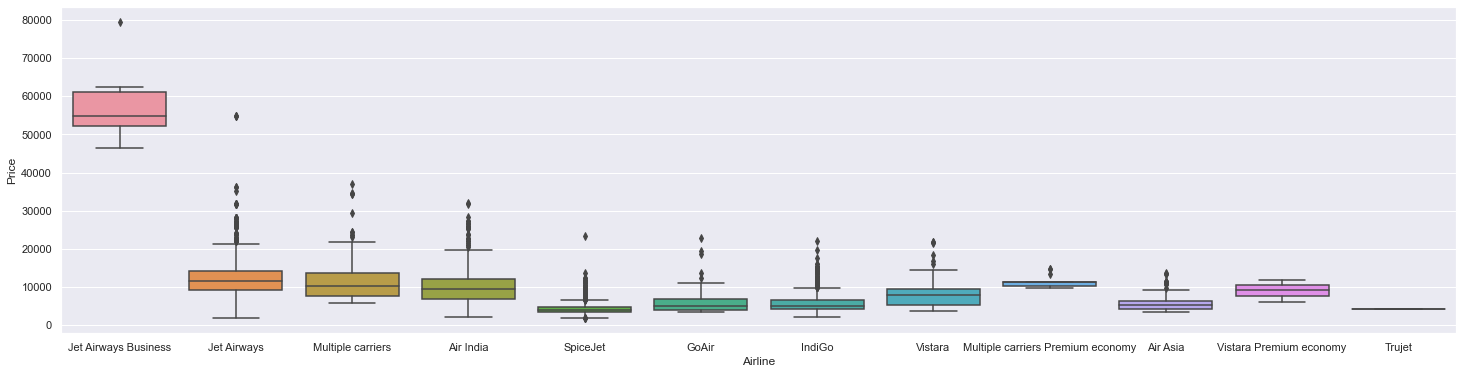

In [18]:
# Lets see the relationship between the Airline and the Price

sns.boxplot(y="Price",x="Airline",data=data.sort_values("Price",ascending=False))
plt.show()

# only Jet Airways Business is showing extraordinary high Price for Flights

In [19]:
# since the Airline is a nominal category, we should use the "One Hot Encoding"

Airlines=pd.get_dummies(data["Airline"],drop_first=True)
Airlines.columns=["Airline_"+name for name in Airlines.columns]
Airlines.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [53]:
# Source

In [20]:
# lets see the frequency distribution Of different kind of sources

data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

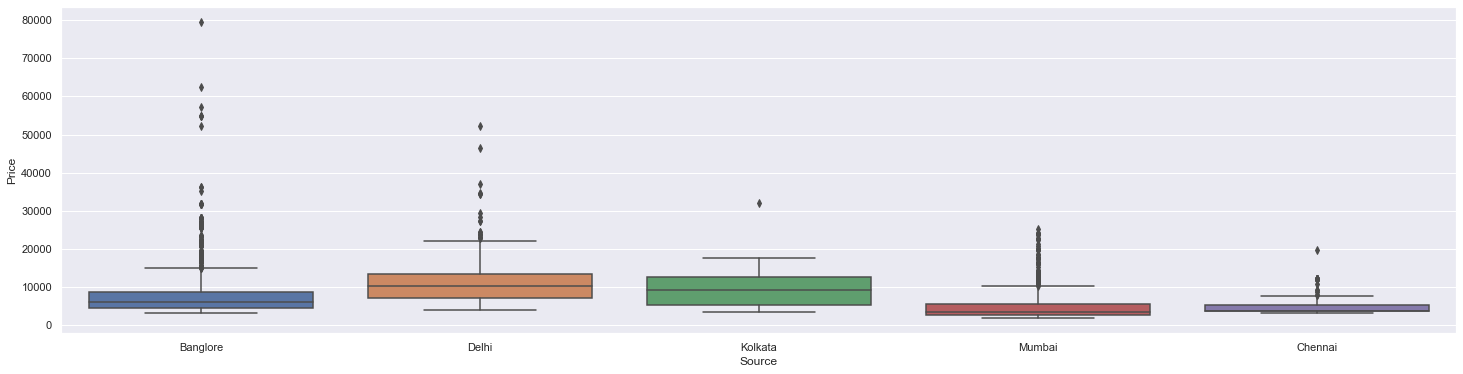

In [21]:
# Lets see the relationship between the Source and the Price

sns.boxplot(y="Price",x="Source",data=data.sort_values("Price",ascending=False))
plt.show()

In [22]:
# since Source is a nominal feature we will be using the "One Hot Endcoding"

Sources=pd.get_dummies(data["Source"],drop_first=True)
Sources.columns=["Sources_"+name for name in Sources.columns]
Sources.head()

,Sources_Chennai,Sources_Delhi,Sources_Kolkata,Sources_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [23]:
# Destination

In [24]:
# lets see the frequency distribution Of different kind of destinations

data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

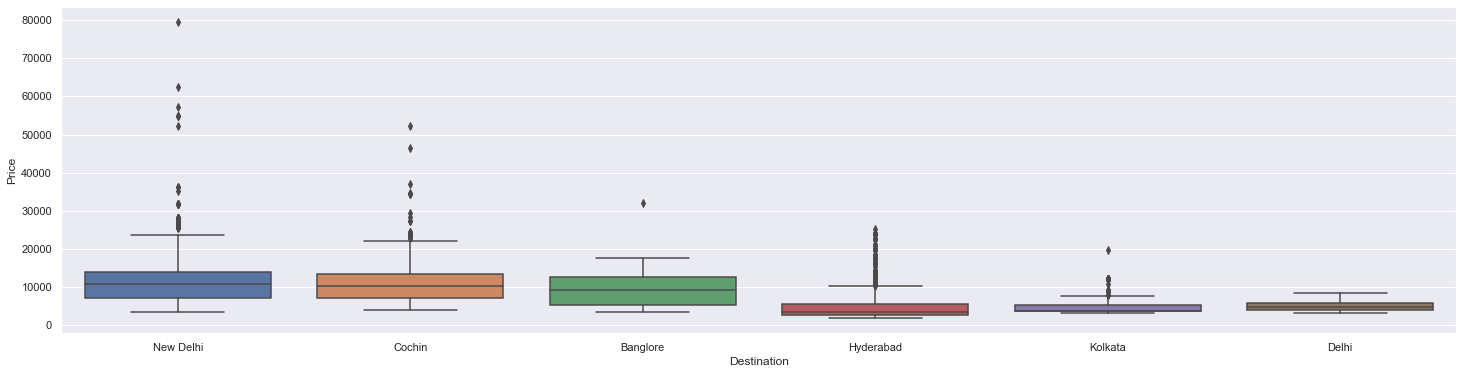

In [25]:
# Lets see the relationship between the Destination and the Price

sns.boxplot(y="Price",x="Destination",data=data.sort_values("Price",ascending=False))
plt.show()

In [26]:
# since Destination is a nominal feature we will be using the "One Hot Endcoding"

Destinations=pd.get_dummies(data["Destination"],drop_first=True)
Destinations.columns=["Destinations_"+name for name in Destinations.columns]
Destinations.head()

,Destinations_Cochin,Destinations_Delhi,Destinations_Hyderabad,Destinations_Kolkata,Destinations_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [61]:
# additional_info

In [27]:
# lets see what are the different values of additional_info
data["Additional_Info"].value_counts()

# out of around 10k values around 8k (that means about 80%) values are "No info"

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [28]:
# no observe that the columns "Route" and "Total_Stops" are related, so only "Total_Stops" will be sufficiently informative for the both of them
# about 80% of the additional information columns are labeled as "No-Info"
# so we can drop the columns "Route" and "Addition_Info"

data.drop(["Additional_Info","Route"],axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [29]:
# now we will manage the "Total_Stops" column. Here the values are given as strings, that should be converted to integers.
# firstly, lets see what are the different values of the "Total_Stops" columns

data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [30]:
# now we will be replacing the values of the Total_Stops column

data["Total_Stops"].replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [31]:
# now we will be concatenating the dummy variables which we had created for Airline Source and Destination

df=pd.concat([data,Airlines,Sources,Destinations],axis=1)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Sources_Chennai,Sources_Delhi,Sources_Kolkata,Sources_Mumbai,Destinations_Cochin,Destinations_Delhi,Destinations_Hyderabad,Destinations_Kolkata,Destinations_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [32]:
# now we will not needing the columns "Airline","Source","Destination" as the corresponding dummies has been added
# so we will be dropping those columns

df.drop(["Airline","Source","Destination"],axis=1,inplace=True)
df.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Sources_Chennai,Sources_Delhi,Sources_Kolkata,Sources_Mumbai,Destinations_Cochin,Destinations_Delhi,Destinations_Hyderabad,Destinations_Kolkata,Destinations_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [33]:
# showing the shape of transformed datset

df.shape

(10682, 30)

### Saving the cleaned train data

In [34]:
df.to_csv('data_cleaned.csv',index=False)